In [1]:
DATOS_DIR = 'C:/Users/Peter/Desktop/all/Facu/Mineria De Datos Usando Sistemas Inteligentes/Datos/'  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel(DATOS_DIR + 'trabajos.xlsx', engine="openpyxl")
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [4]:
df.drop(columns=["index", "Competitors", "Company Name"], inplace=True)


In [5]:
df.head()


,Job Title,Salary Estimate,Job Description,Rating,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD)
2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD)
3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD)
4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable


In [6]:
# Eliminar símbolos y dividir en mínimo y máximo
df[['Sueldo_Min', 'Sueldo_Max']] = df['Salary Estimate'].str.replace(r'[\$K]|\(Glassdoor est.\)', '', regex=True) \
                                                        .str.split('-', expand=True)

# Convertir a números (si no se puede, pone NaN)
df['Sueldo_Min'] = pd.to_numeric(df['Sueldo_Min'], errors='coerce')
df['Sueldo_Max'] = pd.to_numeric(df['Sueldo_Max'], errors='coerce')

# En los casos donde solo hay un sueldo (Sueldo_Max es NaN), usar el mismo valor para min y max
df.loc[df['Sueldo_Max'].isna(), 'Sueldo_Max'] = df['Sueldo_Min']

# Calcular promedio
df['Sueldo_Promedio'] = df[['Sueldo_Min', 'Sueldo_Max']].mean(axis=1)

# Ver resultado
df[['Salary Estimate', 'Sueldo_Min', 'Sueldo_Max', 'Sueldo_Promedio']].head()


,Salary Estimate,Sueldo_Min,Sueldo_Max,Sueldo_Promedio
0,$137K-$171K (Glassdoor est.),137,171.0,154.0
1,$137K-$171K (Glassdoor est.),137,171.0,154.0
2,$137K-$171K (Glassdoor est.),137,171.0,154.0
3,$137K-$171K (Glassdoor est.),137,171.0,154.0
4,$137K-$171K (Glassdoor est.),137,171.0,154.0


In [7]:
# Extraer el código de estado de dos letras de la columna 'Location'
df['Estado'] = df['Location'].str.extract(r',\s*([A-Z]{2})$')

df[['Location', 'Estado']].head()

,Location,Estado
0,"New York, NY",NY
1,"Chantilly, VA",VA
2,"Boston, MA",MA
3,"Newton, MA",MA
4,"New York, NY",NY


In [8]:
# Calcular la antigüedad de la compañía basada en el año de fundación
# Primero, asegurarse de que 'Founded' es numérico
df['Founded'] = pd.to_numeric(df['Founded'], errors='coerce')

# Calcular la antigüedad (año actual - año de fundación)
año_actual = pd.Timestamp.now().year
df['Antigüedad'] = año_actual - df['Founded']

# Eliminar la columna 'Founded' ya que ahora tenemos la antigüedad
df.drop(columns=['Founded'], inplace=True)

# Mostrar el resultado
df[['Size', 'Antigüedad', 'Type of ownership']].head()


,Size,Antigüedad,Type of ownership
0,1001 to 5000 employees,32,Nonprofit Organization
1,5001 to 10000 employees,57,Company - Public
2,1001 to 5000 employees,44,Private Practice / Firm
3,501 to 1000 employees,25,Company - Public
4,51 to 200 employees,27,Company - Private


Análisis de puestos Senior vs Junior:

Ejemplos de registros:


,Job Title,Job Description,Senior,Junior
0,Sr Data Scientist,Description\n\nThe Senior Data Scientist is re...,1,0
1,Data Scientist,"Secure our Nation, Ignite your Future\n\nJoin ...",0,0
2,Data Scientist,Overview\n\n\nAnalysis Group is one of the lar...,1,0
3,Data Scientist,JOB DESCRIPTION:\n\nDo you have a passion for ...,0,0
4,Data Scientist,Data Scientist\nAffinity Solutions / Marketing...,1,0
5,Data Scientist,About Us:\n\nHeadquartered in beautiful Santa ...,1,0
6,Data Scientist / Machine Learning Expert,Posting Title\nData Scientist / Machine Learni...,1,0
7,Data Scientist,Introduction\n\nHave you always wanted to run ...,0,0
8,Staff Data Scientist - Analytics,Intuit is seeking a Staff Data Scientist to co...,1,0
9,Data Scientist,Ready to write the best chapter of your career...,1,0



Distribución de puestos Senior:


Senior
0    191
1    481
Name: count, dtype: int64


Distribución de puestos Junior:


Junior
0    636
1     36
Name: count, dtype: int64

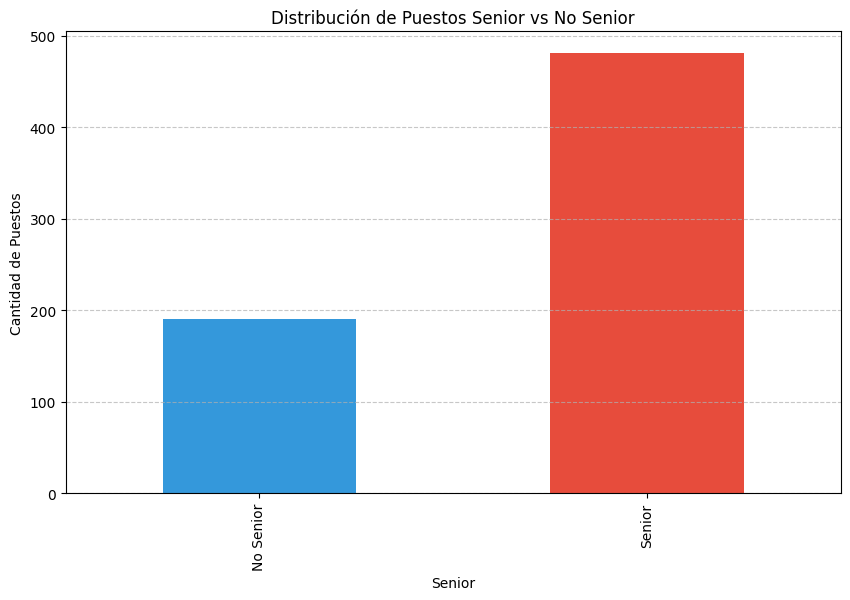

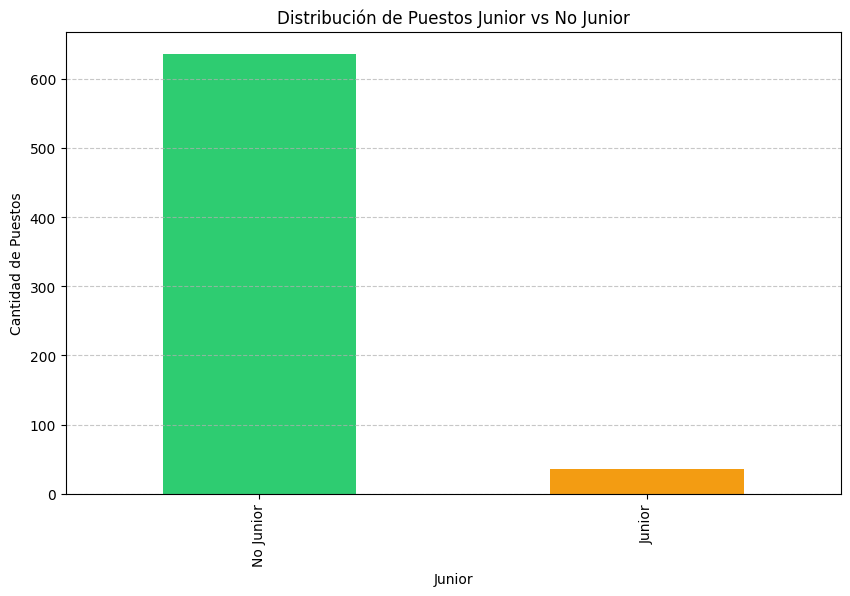

In [9]:
# Definir palabras clave para identificar puestos senior y junior
palabras_senior = ['Senior', 'Sr', 'Lead', 'Principal', 'Manager', 'Director', 'Head']
palabras_senior = '|'.join([p.lower() for p in palabras_senior])

palabras_junior = ['Junior', 'Jr']
palabras_junior = '|'.join([p.lower() for p in palabras_junior])

# Primero verificar si el título contiene palabras senior
df['Senior'] = df['Job Title'].fillna('').str.lower().str.contains(palabras_senior).astype(int)

# Si el título no contiene palabras senior, entonces revisar la descripción
mascara_no_senior_en_titulo = df['Senior'] == 0
df.loc[mascara_no_senior_en_titulo, 'Senior'] = (
    df.loc[mascara_no_senior_en_titulo, 'Job Description'].fillna('').str.lower().str.contains(palabras_senior)
).astype(int)

# Primero verificar si el título contiene palabras junior
df['Junior'] = df['Job Title'].fillna('').str.lower().str.contains(palabras_junior).astype(int)

# Si el título no contiene palabras junior, entonces revisar la descripción
mascara_no_junior_en_titulo = df['Junior'] == 0
df.loc[mascara_no_junior_en_titulo, 'Junior'] = (
    df.loc[mascara_no_junior_en_titulo, 'Job Description'].fillna('').str.lower().str.contains(palabras_junior)
).astype(int)

# Mostrar resultados
print("Análisis de puestos Senior vs Junior:")
print("\nEjemplos de registros:")
display(df[['Job Title', 'Job Description', 'Senior', 'Junior']].head(10))

print("\nDistribución de puestos Senior:")
senior_counts = df["Senior"].value_counts().sort_index()
display(senior_counts)

print("\nDistribución de puestos Junior:")
junior_counts = df["Junior"].value_counts().sort_index()
display(junior_counts)

# Visualización gráfica para Senior
plt.figure(figsize=(10, 6))
senior_counts.plot(kind='bar', color=['#3498db', '#e74c3c'])
plt.title('Distribución de Puestos Senior vs No Senior')
plt.ylabel('Cantidad de Puestos')
plt.xticks([0, 1], ['No Senior', 'Senior'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualización gráfica para Junior
plt.figure(figsize=(10, 6))
junior_counts.plot(kind='bar', color=['#2ecc71', '#f39c12'])
plt.title('Distribución de Puestos Junior vs No Junior')
plt.ylabel('Cantidad de Puestos')
plt.xticks([0, 1], ['No Junior', 'Junior'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [10]:
# Crear atributos binarios para Public y Private basados en Type of ownership
df['Public'] = df['Type of ownership'].fillna('').str.contains('Public').astype(bool)
df['Private'] = df['Type of ownership'].fillna('').str.contains('Private').astype(bool)

# Convertir a enteros después de manejar los NaN
df['Public'] = df['Public'].astype(int)
df['Private'] = df['Private'].astype(int)

# Mostrar ejemplos de los nuevos atributos
display(df[['Type of ownership', 'Public', 'Private']].head())

# Eliminar el atributo original "Type of ownership"
df = df.drop('Type of ownership', axis=1)

,Type of ownership,Public,Private
0,Nonprofit Organization,0,0
1,Company - Public,1,0
2,Private Practice / Firm,0,1
3,Company - Public,1,0
4,Company - Private,0,1


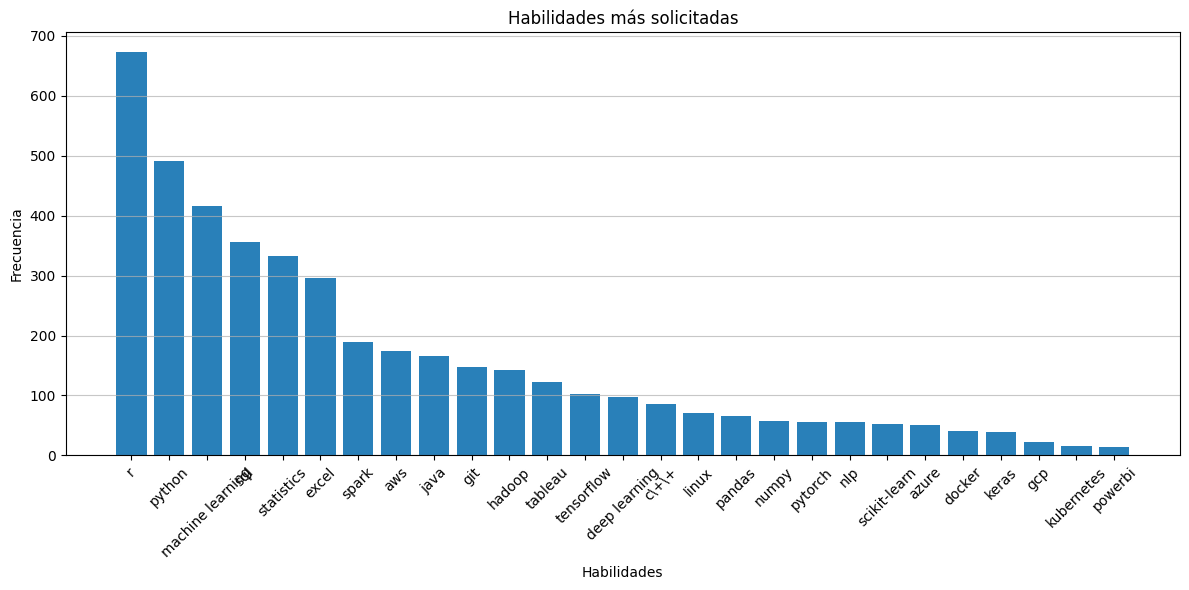


Ejemplos de registros con las 10 habilidades más frecuentes:


,Job Title,r,python,machine learning,sql,statistics,excel,spark,aws,java,git
0,Sr Data Scientist,1,0,1,0,1,0,0,1,0,0
1,Data Scientist,1,0,1,1,1,0,0,0,0,0
2,Data Scientist,1,1,1,0,1,1,0,1,0,0
3,Data Scientist,1,1,1,1,0,1,0,1,0,1
4,Data Scientist,1,1,1,1,1,1,0,0,0,0


In [11]:
# Análisis de habilidades en descripciones de trabajo
# Lista de habilidades técnicas comunes en ciencia de datos / tecnología
habilidades = [
    'python', 'r', 'sql', 'excel', 'tableau', 'powerbi', 'hadoop', 'spark', 'tensorflow',
    'keras', 'pytorch', 'scikit-learn', 'pandas', 'numpy', 'statistics', 'machine learning',
    'deep learning', 'nlp', 'java', 'c\+\+', 'git', 'linux', 'docker', 'kubernetes', 'aws', 'azure', 'gcp'
]

# Crear columnas binarias para cada habilidad
for habilidad in habilidades:
    # Usar regex=False para evitar problemas con caracteres especiales
    # o usar escape para caracteres especiales como en c++
    df[habilidad] = df['Job Description'].fillna('').str.lower().str.contains(habilidad, regex=True, case=False).astype(int)

# Calcular frecuencias y visualizar todas las habilidades
plt.figure(figsize=(12, 6))
conteos = {habilidad: df[habilidad].sum() for habilidad in habilidades}
conteos_ordenados = dict(sorted(conteos.items(), key=lambda x: x[1], reverse=True))
plt.bar(conteos_ordenados.keys(), conteos_ordenados.values(), color='#2980b9')
plt.title('Habilidades más solicitadas')
plt.xlabel('Habilidades')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

# Mantener solo las 10 habilidades más frecuentes en el dataset
top_10_habilidades = list(conteos_ordenados.keys())[:10]
habilidades_a_eliminar = [h for h in habilidades if h not in top_10_habilidades]

# Eliminar columnas de habilidades menos frecuentes
df = df.drop(habilidades_a_eliminar, axis=1)

# Mostrar ejemplos con las 10 habilidades más frecuentes
print("\nEjemplos de registros con las 10 habilidades más frecuentes:")
display(df[['Job Title'] + top_10_habilidades].head())


In [12]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Location,Headquarters,Size,Industry,Sector,Revenue,...,python,r,sql,excel,spark,statistics,machine learning,java,git,aws
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,"New York, NY","New York, NY",1001 to 5000 employees,Insurance Carriers,Insurance,Unknown / Non-Applicable,...,0,1,0,0,0,1,1,0,0,1
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Research & Development,Business Services,$1 to $2 billion (USD),...,0,1,1,0,0,1,1,0,0,0
2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,Consulting,Business Services,$100 to $500 million (USD),...,1,1,0,1,0,1,1,0,0,1
3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),...,1,1,1,1,0,0,1,0,1,1
4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,"New York, NY","New York, NY",51 to 200 employees,Advertising & Marketing,Business Services,Unknown / Non-Applicable,...,1,1,1,1,0,1,1,0,0,0


Distribución de industrias después de la conversión:


Industry
Other                                      155
-1                                          71
Biotech & Pharmaceuticals                   66
IT Services                                 61
Computer Hardware & Software                57
Aerospace & Defense                         46
Enterprise Software & Network Solutions     43
Consulting                                  38
Staffing & Outsourcing                      36
Insurance Carriers                          28
Internet                                    27
Advertising & Marketing                     23
Health Care Services & Hospitals            21
Name: count, dtype: int64

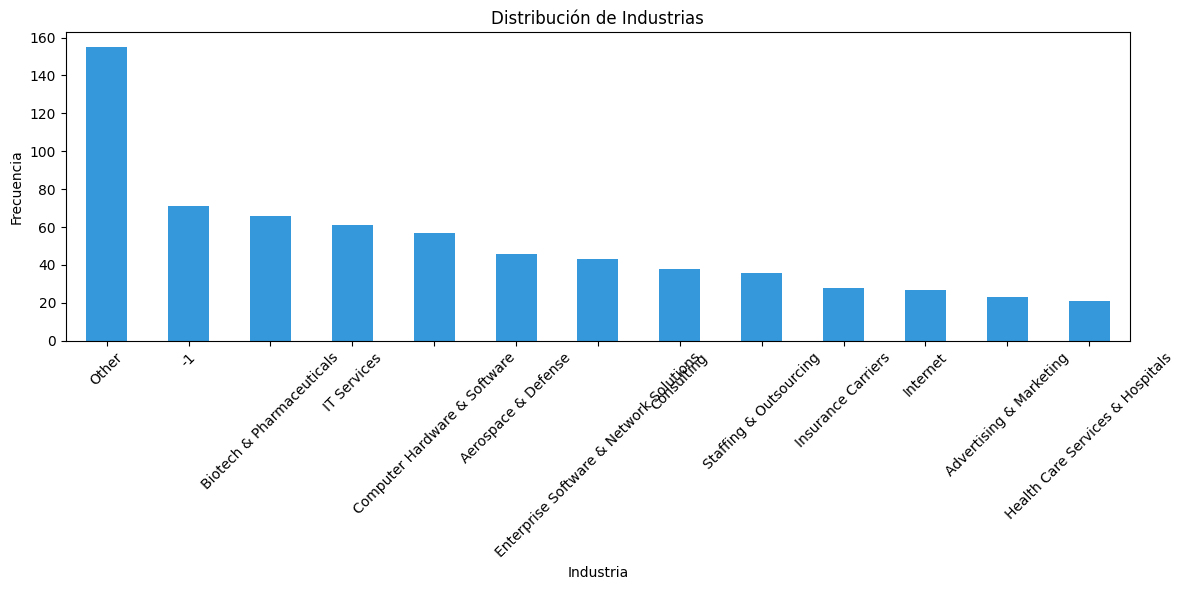

In [13]:
# Contar las ocurrencias de cada industria
conteo_industrias = df['Industry'].value_counts()

# Identificar industrias con menos de 20 ocurrencias
industrias_poco_frecuentes = conteo_industrias[conteo_industrias < 20].index

# Convertir industrias poco frecuentes a "Other"
df['Industry'] = df['Industry'].apply(lambda x: 'Other' if x in industrias_poco_frecuentes else x)

# Mostrar el resultado
print("Distribución de industrias después de la conversión:")
display(df['Industry'].value_counts())

# Visualizar la distribución de industrias
plt.figure(figsize=(12, 6))
df['Industry'].value_counts().plot(kind='bar', color='#3498db')
plt.title('Distribución de Industrias')
plt.xlabel('Industria')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
# Eliminar los atributos "Job Title" y "Job Description"
df = df.drop(['Job Title', 'Job Description'], axis=1)

# Mostrar las primeras filas para verificar que se han eliminado
print("Dataframe después de eliminar 'Job Title' y 'Job Description':")
display(df.head())


Dataframe después de eliminar 'Job Title' y 'Job Description':


,Salary Estimate,Rating,Location,Headquarters,Size,Industry,Sector,Revenue,Sueldo_Min,Sueldo_Max,...,python,r,sql,excel,spark,statistics,machine learning,java,git,aws
0,$137K-$171K (Glassdoor est.),3.1,"New York, NY","New York, NY",1001 to 5000 employees,Insurance Carriers,Insurance,Unknown / Non-Applicable,137,171.0,...,0,1,0,0,0,1,1,0,0,1
1,$137K-$171K (Glassdoor est.),4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Other,Business Services,$1 to $2 billion (USD),137,171.0,...,0,1,1,0,0,1,1,0,0,0
2,$137K-$171K (Glassdoor est.),3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,Consulting,Business Services,$100 to $500 million (USD),137,171.0,...,1,1,0,1,0,1,1,0,0,1
3,$137K-$171K (Glassdoor est.),3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,Other,Manufacturing,$100 to $500 million (USD),137,171.0,...,1,1,1,1,0,0,1,0,1,1
4,$137K-$171K (Glassdoor est.),2.9,"New York, NY","New York, NY",51 to 200 employees,Advertising & Marketing,Business Services,Unknown / Non-Applicable,137,171.0,...,1,1,1,1,0,1,1,0,0,0


In [15]:
# Verificar cuántos valores faltantes hay en el dataframe
print("Valores faltantes por columna antes de la eliminación:")
display(df.isnull().sum())

# Eliminar filas con valores faltantes
df_limpio = df.dropna()

# Verificar cuántas filas se eliminaron
print(f"\nFilas antes de eliminar valores faltantes: {df.shape[0]}")
print(f"Filas después de eliminar valores faltantes: {df_limpio.shape[0]}")
print(f"Se eliminaron {df.shape[0] - df_limpio.shape[0]} filas con valores faltantes")

# Asignar el dataframe limpio al original
df = df_limpio

# Verificar que no queden valores faltantes
print("\nValores faltantes por columna después de la eliminación:")
display(df.isnull().sum())


Valores faltantes por columna antes de la eliminación:


Salary Estimate      0
Rating               0
Location             0
Headquarters         0
Size                 0
Industry             0
Sector               0
Revenue              0
Sueldo_Min           0
Sueldo_Max           0
Sueldo_Promedio      0
Estado              23
Antigüedad           0
Senior               0
Junior               0
Public               0
Private              0
python               0
r                    0
sql                  0
excel                0
spark                0
statistics           0
machine learning     0
java                 0
git                  0
aws                  0
dtype: int64


Filas antes de eliminar valores faltantes: 672
Filas después de eliminar valores faltantes: 649
Se eliminaron 23 filas con valores faltantes

Valores faltantes por columna después de la eliminación:


Salary Estimate     0
Rating              0
Location            0
Headquarters        0
Size                0
Industry            0
Sector              0
Revenue             0
Sueldo_Min          0
Sueldo_Max          0
Sueldo_Promedio     0
Estado              0
Antigüedad          0
Senior              0
Junior              0
Public              0
Private             0
python              0
r                   0
sql                 0
excel               0
spark               0
statistics          0
machine learning    0
java                0
git                 0
aws                 0
dtype: int64

In [16]:
# Verificar si hay filas duplicadas en el dataframe
print("Número de filas duplicadas:", df.duplicated().sum())

# Eliminar filas duplicadas
df_sin_duplicados = df.drop_duplicates()

# Verificar cuántas filas se eliminaron
print(f"\nFilas antes de eliminar duplicados: {df.shape[0]}")
print(f"Filas después de eliminar duplicados: {df_sin_duplicados.shape[0]}")
print(f"Se eliminaron {df.shape[0] - df_sin_duplicados.shape[0]} filas duplicadas")

# Asignar el dataframe sin duplicados al original
df = df_sin_duplicados

# Es conveniente eliminar duplicados después de eliminar valores nulos y columnas innecesarias porque:
# 1. Al eliminar columnas, pueden aparecer más duplicados (menos columnas = menos diferenciación)
# 2. Al eliminar filas con valores nulos, nos aseguramos de trabajar solo con datos completos
# 3. Es más eficiente computacionalmente buscar duplicados en un dataset más pequeño y limpio
# 4. Evitamos eliminar filas que podrían ser útiles para completar valores faltantes

# Verificar que el dataframe está limpio
print("\nDimensiones finales del dataframe limpio:", df.shape)


Número de filas duplicadas: 13

Filas antes de eliminar duplicados: 649
Filas después de eliminar duplicados: 636
Se eliminaron 13 filas duplicadas

Dimensiones finales del dataframe limpio: (636, 27)


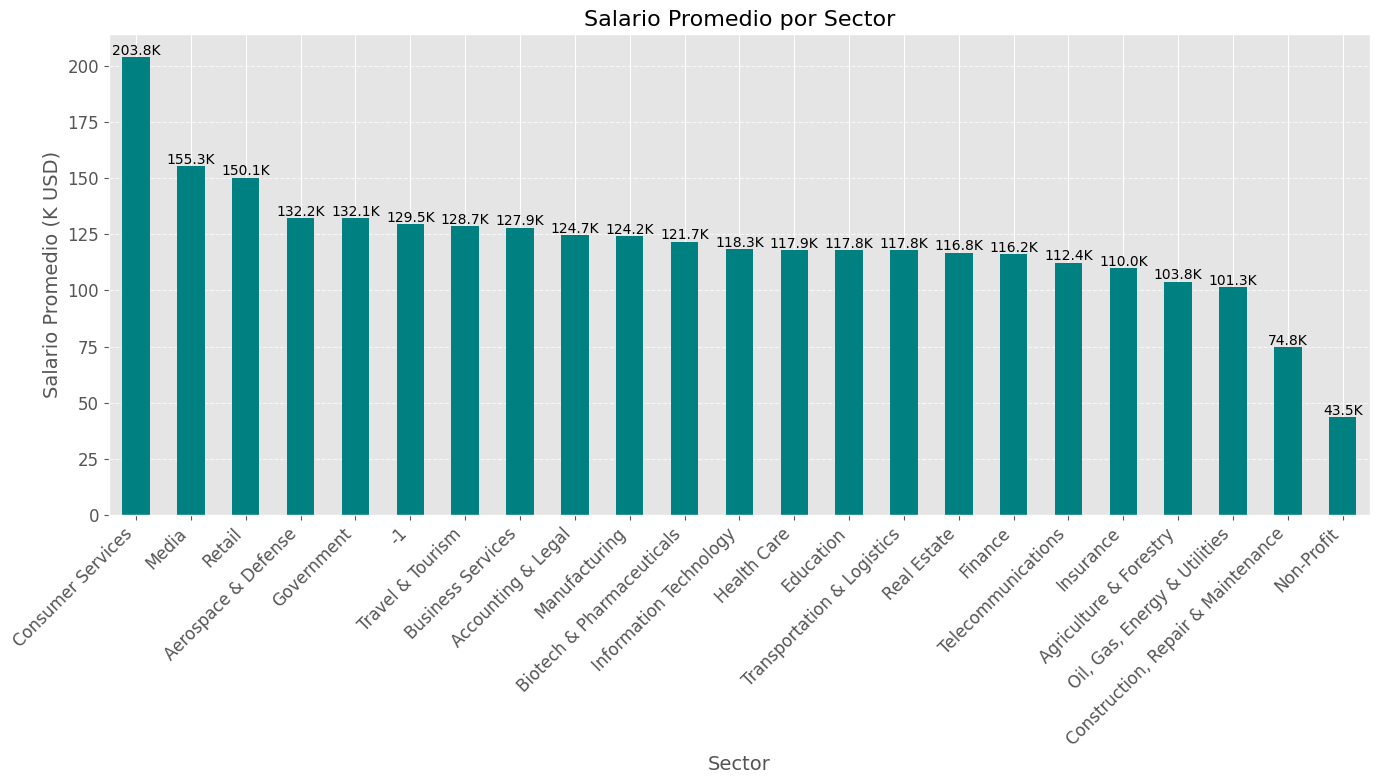

C:\Users\Peter\AppData\Local\Temp\ipykernel_7732\3923872037.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=skill_counts.index, y=skill_counts.values, palette='viridis')


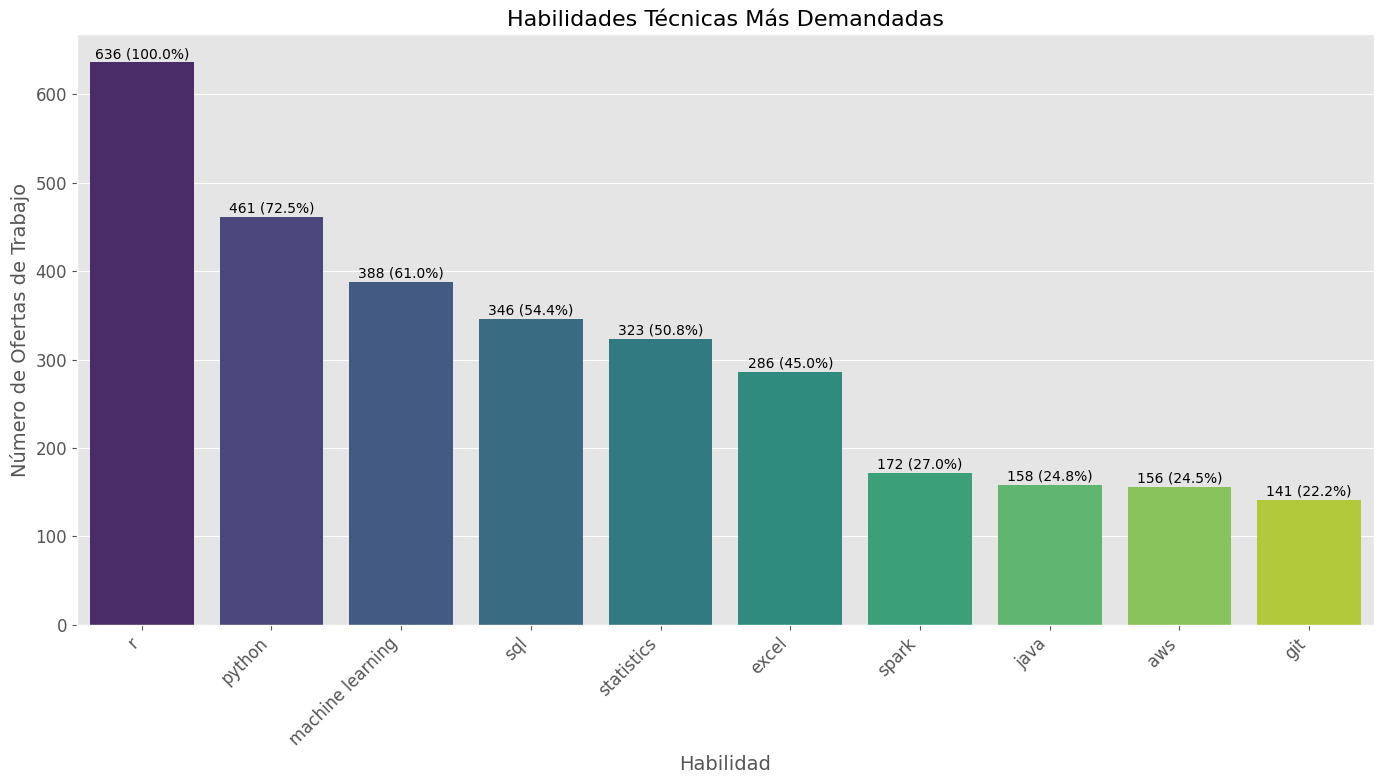

C:\Users\Peter\AppData\Local\Temp\ipykernel_7732\3923872037.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=estado_salario_filtrado.index, y=estado_salario_filtrado.values, palette='viridis')


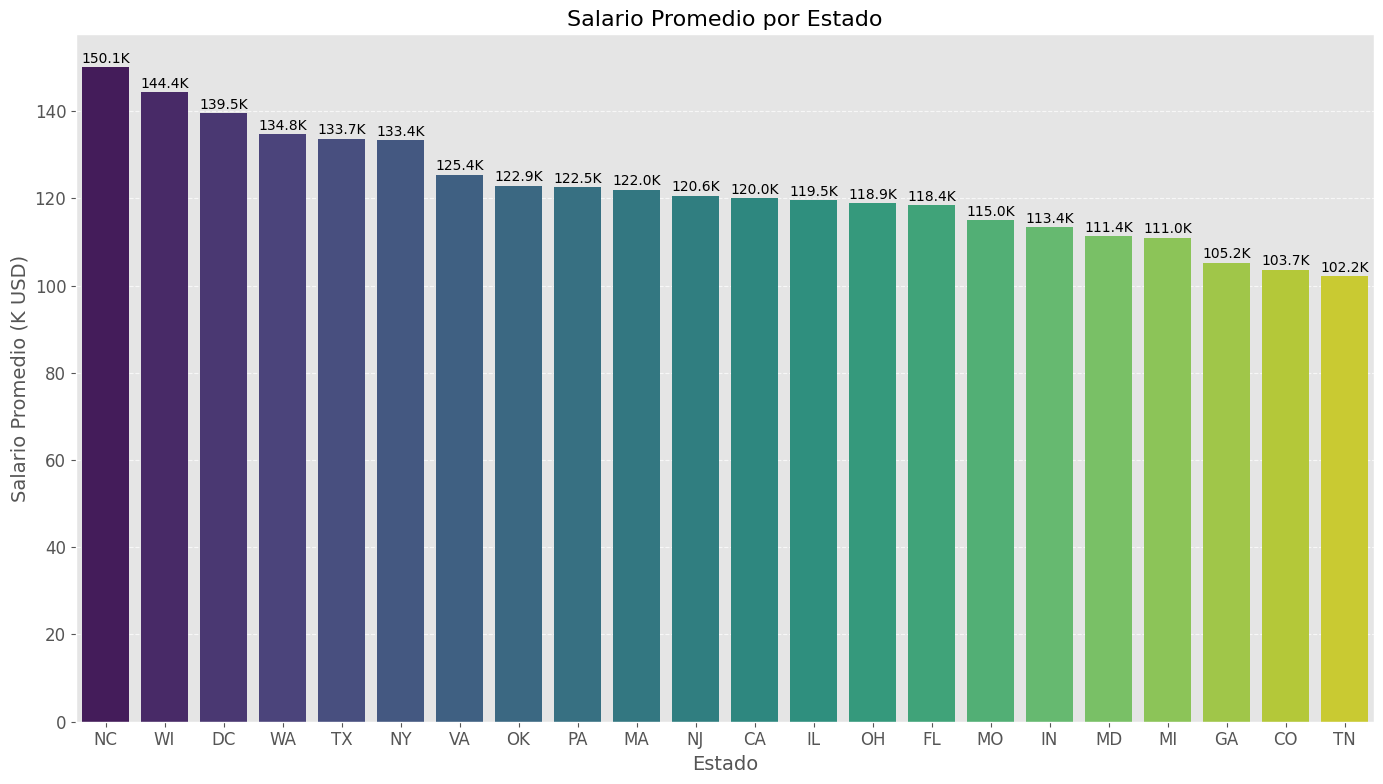

In [17]:
# Configuración para visualización
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Gráfico 1: Distribución de salarios promedio por sector
plt.figure(figsize=(14, 8))
sector_salary = df.groupby('Sector')['Sueldo_Promedio'].mean().sort_values(ascending=False)
ax = sector_salary.plot(kind='bar', color='teal')
plt.title('Salario Promedio por Sector', fontsize=16)
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Salario Promedio (K USD)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir valores en las barras
for i, v in enumerate(sector_salary):
    ax.text(i, v + 1, f'{v:.1f}K', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Gráfico 2: Habilidades técnicas más demandadas
plt.figure(figsize=(14, 8))
skills = ['python', 'r', 'sql', 'excel', 'spark', 'statistics', 'machine learning', 'java', 'git', 'aws']
skill_counts = df[skills].sum().sort_values(ascending=False)

ax = sns.barplot(x=skill_counts.index, y=skill_counts.values, palette='viridis')
plt.title('Habilidades Técnicas Más Demandadas', fontsize=16)
plt.xlabel('Habilidad', fontsize=14)
plt.ylabel('Número de Ofertas de Trabajo', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Añadir porcentajes sobre las barras
total = len(df)
for i, v in enumerate(skill_counts):
    ax.text(i, v + 5, f'{v} ({v/total*100:.1f}%)', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Gráfico 3: Relación entre ubicación (Estado) y salario promedio
plt.figure(figsize=(14, 8))

# Calcular el salario promedio por estado y ordenar
estado_salario = df.groupby('Estado')['Sueldo_Promedio'].mean().sort_values(ascending=False)
# Filtrar para mostrar solo los estados con más de 5 ofertas
estado_count = df['Estado'].value_counts()
estados_relevantes = estado_count[estado_count >= 5].index
estado_salario_filtrado = estado_salario[estado_salario.index.isin(estados_relevantes)]

# Crear el gráfico de barras
ax = sns.barplot(x=estado_salario_filtrado.index, y=estado_salario_filtrado.values, palette='viridis')
plt.title('Salario Promedio por Estado', fontsize=16)
plt.xlabel('Estado', fontsize=14)
plt.ylabel('Salario Promedio (K USD)', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir valores en las barras
for i, v in enumerate(estado_salario_filtrado):
    ax.text(i, v + 1, f'{v:.1f}K', ha='center', fontsize=10)

plt.tight_layout()
plt.show()
